In [1]:
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd

# Load the Excel file
df = pd.read_csv('D:/archive/telecom_churn.csv')

# Step 1: Filter high-value customers
def filter_high_value_customers(df):
    # Calculate the average recharge amount for the first two months
    df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2
    
    # Calculate the 70th percentile of the average recharge amount
    percentile_70 = df['avg_rech_amt_6_7'].quantile(0.7)
    
    # Filter high-value customers
    high_value_customers = df[df['avg_rech_amt_6_7'] >= percentile_70]
    
    return high_value_customers

high_value_customers_df = filter_high_value_customers(df)

# Step 2: Tag churners and remove attributes of the churn phase
def tag_churners_and_remove_attributes(df):
    # Tag churners based on the criteria
    df['churn'] = ((df['total_ic_mou_9'] == 0) & 
                   (df['total_og_mou_9'] == 0) & 
                   (df['vol_2g_mb_9'] == 0) & 
                   (df['vol_3g_mb_9'] == 0)).astype(int)
    
    # Remove attributes corresponding to the churn phase
    churn_phase_attributes = [col for col in df.columns if '_9' in col]
    df.drop(churn_phase_attributes, axis=1, inplace=True)
    
    return df

processed_df = tag_churners_and_remove_attributes(high_value_customers_df)

# Save the processed data to a new Excel file
processed_df.to_csv('D:/archive/first_.csv', index=False)
#https://raw.githubusercontent.com/vishal1994/churn/main/Clean_data.csv
#first_.csv=Clean_data.csv


In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/vishal1994/churn/main/first_.csv')

# Step 1: Remove missing values
df.dropna(inplace=True)

# Step 2: Normalize numeric data
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Save the processed data to a new CSV file
df.to_csv('D:/archive/sec_.csv', index=False)
 

In [40]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7,0.062103,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.143268,0.381877,...,1.0,1.0,1.0,0.277228,0.027725,0.295325,0.153559,0.0,0.321344,0.0
11,0.907943,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.143428,0.187960,...,1.0,0.0,0.0,0.124849,0.000000,0.000000,0.000000,0.0,0.184359,0.0
12,0.904719,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.063884,0.057667,...,1.0,1.0,1.0,0.132577,0.021521,0.058439,0.130702,0.0,0.017573,0.0
13,0.698041,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.177219,0.115953,...,1.0,1.0,1.0,0.706593,0.139289,0.398162,0.169468,0.0,0.160004,0.0
15,0.063246,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.080973,0.068741,...,1.0,1.0,1.0,0.229655,0.000000,0.000000,0.000000,0.0,0.042031,0.0


In [41]:
df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
29993,0.883163,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.058663,0.128475,...,1.0,1.0,1.0,0.523787,0.000000,0.000000,0.000000,0.000000,0.036892,0.0
30001,0.874785,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.160382,0.111444,...,1.0,1.0,1.0,0.249698,0.133867,0.125616,0.000000,0.121075,0.134724,0.0
30002,0.743456,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.036063,0.101185,...,1.0,1.0,1.0,0.420913,0.004988,0.007115,0.000000,0.000000,0.021272,0.0
30008,0.717312,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.093002,0.079047,...,1.0,1.0,1.0,0.607583,0.038514,0.065317,0.054099,0.000000,0.098654,0.0
30010,0.206866,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.044260,0.054943,...,1.0,1.0,1.0,0.071963,0.111932,0.125582,0.105065,0.000000,0.000206,0.0


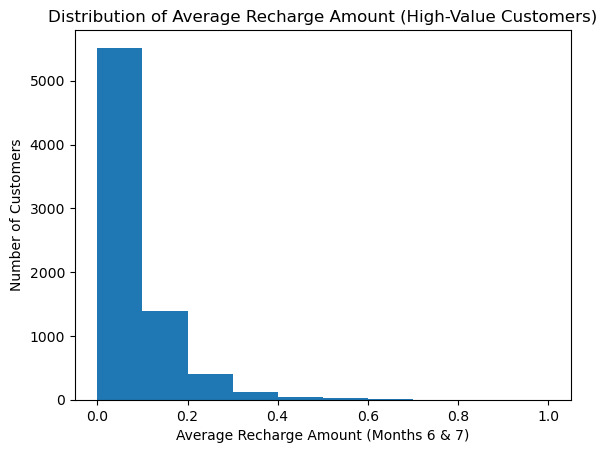

In [42]:
import pandas as pd
import matplotlib.pyplot as plt  # Or import seaborn for more advanced visualizations

#final
processed_df = pd.read_csv('https://raw.githubusercontent.com/vishal1994/churn/main/sec_.csv')

plt.hist(processed_df['avg_rech_amt_6_7'])
plt.xlabel('Average Recharge Amount (Months 6 & 7)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Average Recharge Amount (High-Value Customers)')
plt.show()



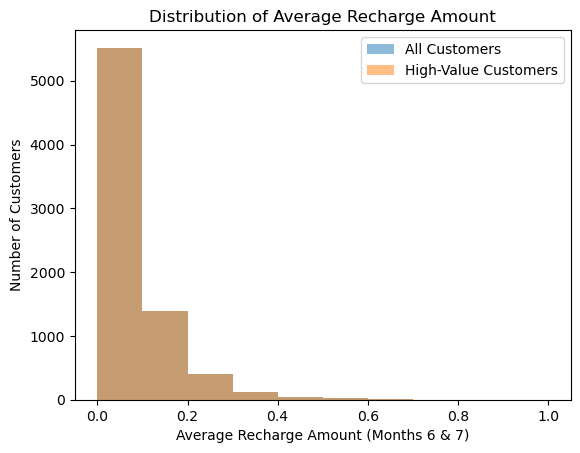

In [43]:
plt.hist(df['avg_rech_amt_6_7'], alpha=0.5, label='All Customers')  # Load full dataset (df)
plt.hist(processed_df['avg_rech_amt_6_7'], alpha=0.5, label='High-Value Customers')
plt.xlabel('Average Recharge Amount (Months 6 & 7)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Average Recharge Amount')
plt.legend()
plt.show()


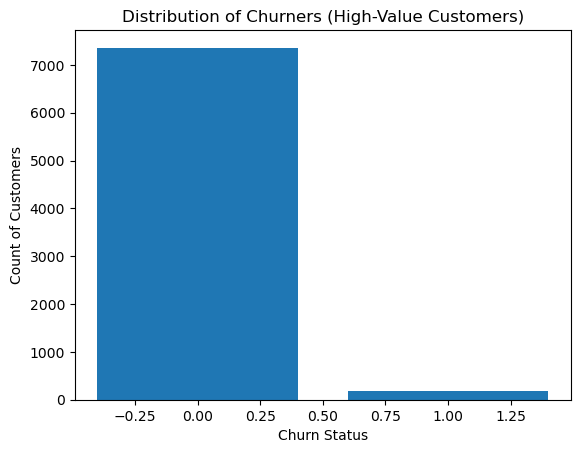

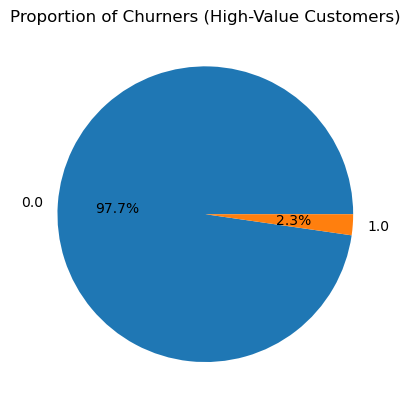

In [44]:
churn_counts = processed_df['churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn Status')
plt.ylabel('Count of Customers')
plt.title('Distribution of Churners (High-Value Customers)')
plt.show()

# Or, for a pie chart:
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Churners (High-Value Customers)')
plt.show()


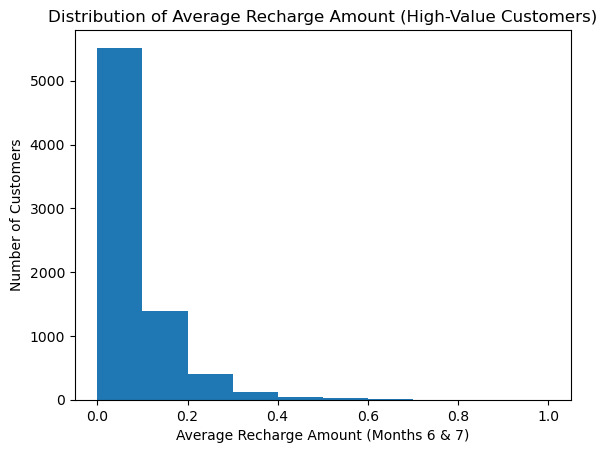

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'processed_df' holds your high-value customer data

plt.hist(processed_df['avg_rech_amt_6_7'])
plt.xlabel('Average Recharge Amount (Months 6 & 7)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Average Recharge Amount (High-Value Customers)')
plt.show()


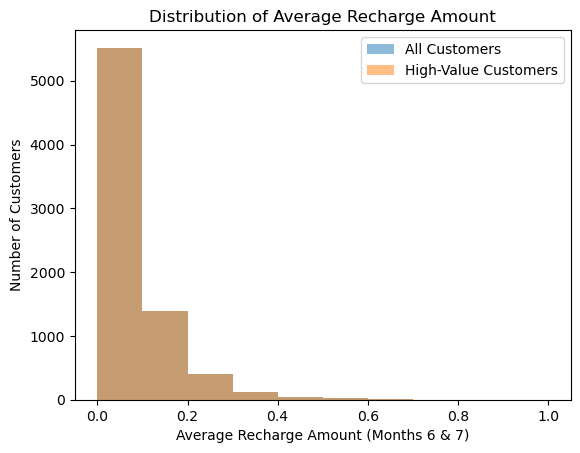

In [46]:
# Assuming 'df' holds your full dataset

plt.hist(df['avg_rech_amt_6_7'], alpha=0.5, label='All Customers')
plt.hist(processed_df['avg_rech_amt_6_7'], alpha=0.5, label='High-Value Customers')
plt.xlabel('Average Recharge Amount (Months 6 & 7)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Average Recharge Amount')
plt.legend()
plt.show()


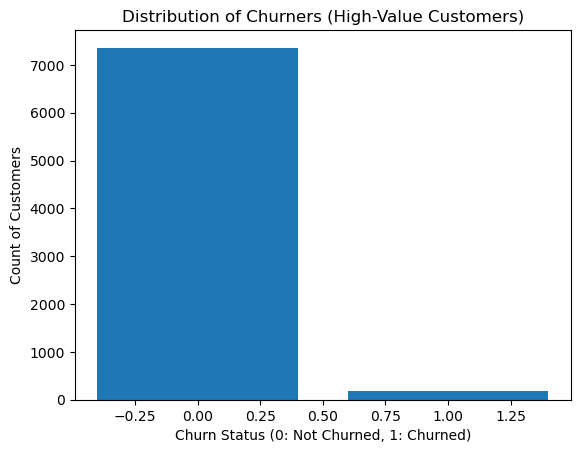

In [47]:
churn_counts = processed_df['churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn Status (0: Not Churned, 1: Churned)')
plt.ylabel('Count of Customers')
plt.title('Distribution of Churners (High-Value Customers)')
plt.show()


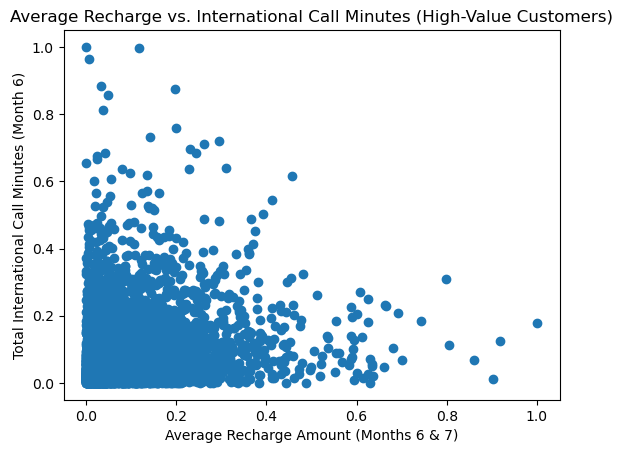

In [48]:
plt.scatter(processed_df['avg_rech_amt_6_7'], processed_df['total_ic_mou_6'])
plt.xlabel('Average Recharge Amount (Months 6 & 7)')
plt.ylabel('Total International Call Minutes (Month 6)')
plt.title('Average Recharge vs. International Call Minutes (High-Value Customers)')
plt.show()


In [49]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # Required for customization (optional)
processed_df = pd.read_csv('D:/archive/final.csv')



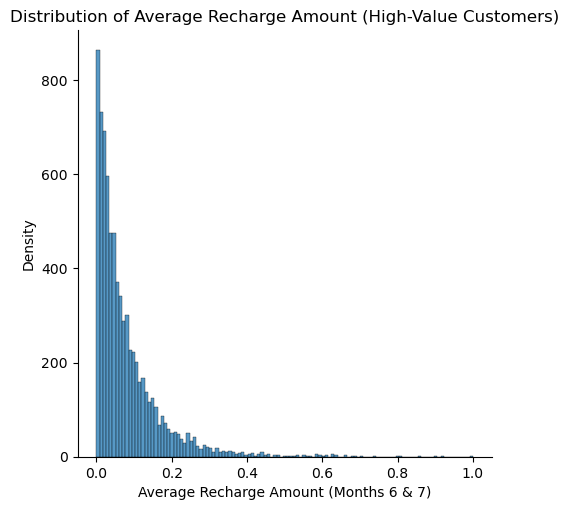

In [50]:
sns.displot(processed_df['avg_rech_amt_6_7'])  # Kernel density estimation for smoother distribution
plt.xlabel('Average Recharge Amount (Months 6 & 7)')
plt.ylabel('Density')
plt.title('Distribution of Average Recharge Amount (High-Value Customers)')
plt.show()


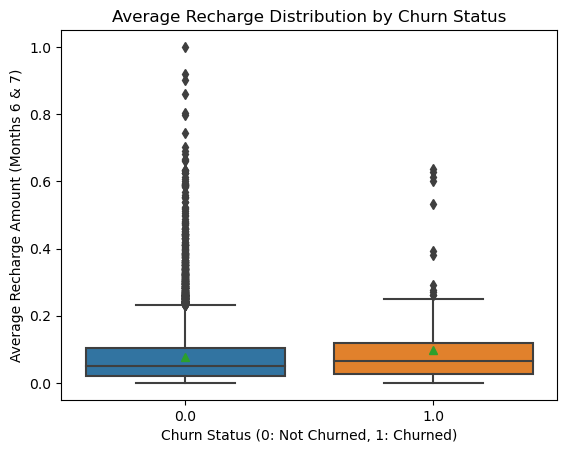

In [51]:
sns.boxplot(x='churn', y='avg_rech_amt_6_7', showmeans=True, data=processed_df)  # Show means with boxplots
plt.xlabel('Churn Status (0: Not Churned, 1: Churned)')
plt.ylabel('Average Recharge Amount (Months 6 & 7)')
plt.title('Average Recharge Distribution by Churn Status')
plt.show()


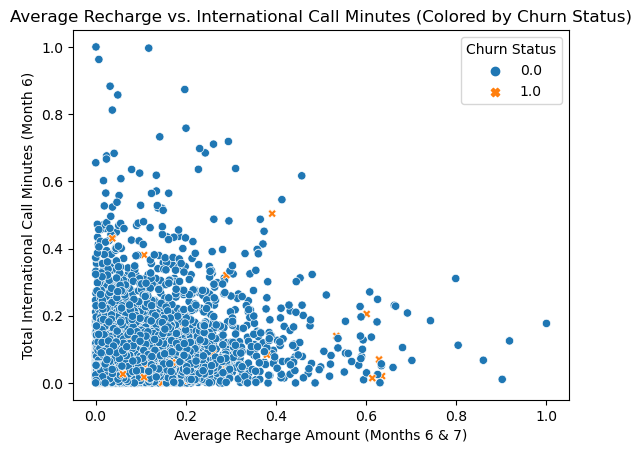

In [52]:
sns.scatterplot(x='avg_rech_amt_6_7', y='total_ic_mou_6', hue='churn', style='churn', data=processed_df)
plt.xlabel('Average Recharge Amount (Months 6 & 7)')
plt.ylabel('Total International Call Minutes (Month 6)')
plt.title('Average Recharge vs. International Call Minutes (Colored by Churn Status)')
plt.legend(title='Churn Status')  # Legend for color and style
plt.show()


In [53]:
import plotly.express as px

fig = px.scatter(processed_df, x='avg_rech_amt_6_7', y='total_ic_mou_6', color='churn')
fig.show()


In [54]:


# Assuming 'processed_df' holds your data

fig = px.scatter(processed_df, x='avg_rech_amt_6_7', y='total_ic_mou_6', color='churn')
fig.update_layout(
    title='Average Recharge vs. International Call Minutes (Colored by Churn)',
    xaxis_title='Average Recharge Amount (Months 6 & 7)',
    yaxis_title='Total International Call Minutes (Month 6)',
    hovermode='closest'  # Highlight closest point on hover
)
fig.show()


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/vishal1994/churn/main/sec_.csv")


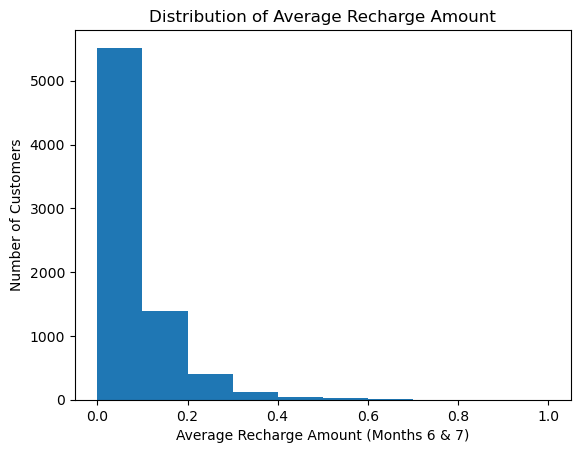

In [57]:
plt.hist(df["avg_rech_amt_6_7"])
plt.xlabel("Average Recharge Amount (Months 6 & 7)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Average Recharge Amount")
plt.show()


In [58]:
#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
 

In [59]:
data=pandas.read_csv('https://raw.githubusercontent.com/vishal1994/churn/main/sec_.csv')


In [60]:
data.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
0,0.062103,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.143268,0.381877,...,1.0,1.0,1.0,0.277228,0.027725,0.295325,0.153559,0.0,0.321344,0.0
1,0.907943,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.143428,0.187960,...,1.0,0.0,0.0,0.124849,0.000000,0.000000,0.000000,0.0,0.184359,0.0
2,0.904719,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.063884,0.057667,...,1.0,1.0,1.0,0.132577,0.021521,0.058439,0.130702,0.0,0.017573,0.0
3,0.698041,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.177219,0.115953,...,1.0,1.0,1.0,0.706593,0.139289,0.398162,0.169468,0.0,0.160004,0.0
4,0.063246,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.080973,0.068741,...,1.0,1.0,1.0,0.229655,0.000000,0.000000,0.000000,0.0,0.042031,0.0


In [61]:
data.tail()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7527,0.883163,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.058663,0.128475,...,1.0,1.0,1.0,0.523787,0.000000,0.000000,0.000000,0.000000,0.036892,0.0
7528,0.874785,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.160382,0.111444,...,1.0,1.0,1.0,0.249698,0.133867,0.125616,0.000000,0.121075,0.134724,0.0
7529,0.743456,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.036063,0.101185,...,1.0,1.0,1.0,0.420913,0.004988,0.007115,0.000000,0.000000,0.021272,0.0
7530,0.717312,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.093002,0.079047,...,1.0,1.0,1.0,0.607583,0.038514,0.065317,0.054099,0.000000,0.098654,0.0
7531,0.206866,0.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.044260,0.054943,...,1.0,1.0,1.0,0.071963,0.111932,0.125582,0.105065,0.000000,0.000206,0.0


In [62]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7532 entries, 0 to 7531
Columns: 174 entries, mobile_number to churn
dtypes: float64(165), object(9)
memory usage: 10.0+ MB


In [63]:
data.describe()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
count,7532.000000,7532.0,7532.0,7532.0,7532.0,7532.000000,7532.000000,7532.000000,7532.000000,7532.000000,...,7532.000000,7532.000000,7532.000000,7532.000000,7532.000000,7532.000000,7532.000000,7532.000000,7532.000000,7532.000000
mean,0.516152,0.0,0.0,0.0,0.0,0.091829,0.109600,0.100505,0.031732,0.026206,...,0.930961,0.932289,0.931227,0.283357,0.028956,0.042371,0.031140,0.008419,0.078864,0.022836
std,0.276197,0.0,0.0,0.0,0.0,0.059980,0.065703,0.068413,0.059596,0.051284,...,0.253537,0.251266,0.253085,0.241791,0.047412,0.070997,0.055825,0.037848,0.089996,0.149390
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294439,0.0,0.0,0.0,0.0,0.054916,0.068710,0.057529,0.003962,0.003102,...,1.000000,1.000000,1.000000,0.075586,0.000000,0.000000,0.000000,0.000000,0.020527,0.000000
50%,0.525217,0.0,0.0,0.0,0.0,0.074690,0.091234,0.083124,0.012216,0.009630,...,1.000000,1.000000,1.000000,0.204057,0.009216,0.011797,0.006848,0.000000,0.050252,0.000000
75%,0.746883,0.0,0.0,0.0,0.0,0.108975,0.129390,0.123236,0.032560,0.026208,...,1.000000,1.000000,1.000000,0.486054,0.040814,0.060548,0.041835,0.000000,0.104948,0.000000
max,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# The average revenue per user (ARPU) for the months 6, 7, and 8 is 0.10. 

In [65]:
# The maximum minutes of usage (MOU) for any type of call in any month is 1.0. 

In [66]:
# The minimum minutes of usage (MOU) for any type of call in any month is 0.0.

In [67]:
# The median minutes of roaming incoming and outgoing calls for the months 6, 7, and 8 is 0.0.